In [2]:
import pandas as pd
path="C:\\Users\\Sanjana Shekar\\Desktop\\Data Analytics\\breast-cancer\\data1.csv"
df=pd.read_csv(path)

In [3]:
df.describe

<bound method NDFrame.describe of      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89

In [7]:
from sklearn.preprocessing import StandardScaler
features = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean',
            'concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se',
            'smoothness_se','compactness_se','concavity_se',
            'concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst',
            'area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst',
            'fractal_dimension_worst'
]
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['diagnosis']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [8]:
print(x)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [10]:
print(principalDf)

     principal component 1  principal component 2
0                 9.192837               1.948583
1                 2.387802              -3.768172
2                 5.733896              -1.075174
3                 7.122953              10.275589
4                 3.935302              -1.948072
5                 2.380247               3.949929
6                 2.238883              -2.690031
7                 2.143299               2.340244
8                 3.174924               3.391813
9                 6.351747               7.727174
10               -0.810414              -2.659275
11                2.651100               0.066568
12                8.185034               2.700976
13                0.342126              -0.968279
14                4.342379               4.861083
15                4.075656               2.977061
16                0.230055              -1.564758
17                4.418011               1.418670
18                4.948704              -4.114334


In [11]:
finalDf = pd.concat([principalDf, df[['diagnosis']]], axis = 1)

In [12]:
print(finalDf)

     principal component 1  principal component 2 diagnosis
0                 9.192837               1.948583         M
1                 2.387802              -3.768172         M
2                 5.733896              -1.075174         M
3                 7.122953              10.275589         M
4                 3.935302              -1.948072         M
5                 2.380247               3.949929         M
6                 2.238883              -2.690031         M
7                 2.143299               2.340244         M
8                 3.174924               3.391813         M
9                 6.351747               7.727174         M
10               -0.810414              -2.659275         M
11                2.651100               0.066568         M
12                8.185034               2.700976         M
13                0.342126              -0.968279         M
14                4.342379               4.861083         M
15                4.075656              

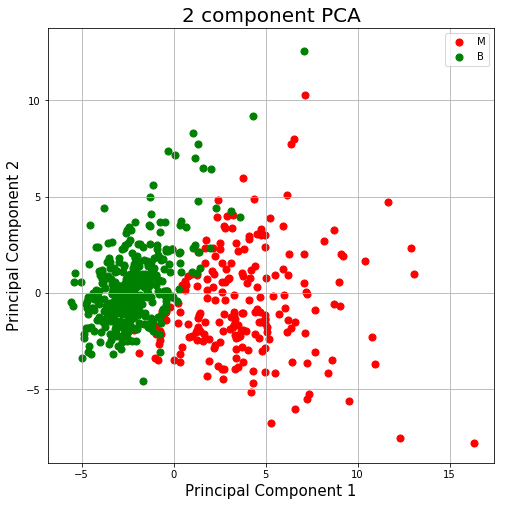

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()


In [4]:
kpca = KernelPCA(kernel=”rbf”, fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X)
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c=”red”,s=20, edgecolor=’k’)
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c=”blue”,s=20, edgecolor=’k’)
x = np.linspace(-1, 1, 1000)
plt.plot(x, -0.1*x, linestyle=’solid’)
plt.title(“Projection by KPCA”)
plt.xlabel(r”1st principal component in space induced by $\phi$”)
plt.ylabel(“2nd component”)

SyntaxError: invalid character in identifier (<ipython-input-4-306f664339d9>, line 1)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
print(pca.explained_variance_ratio)

NameError: name 'x' is not defined

In [ ]:
autoplot(cancer.pca2, data = bc_data,  colour = 'diagnosis',
                    loadings = FALSE, loadings.label = TRUE, loadings.colour = "blue")

NameError: name 'pca' is not defined